1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

[4000.0, 6100.0, 9800.0, 35200.0, 59400.0, 41700.0, 19000.0, 13000.0, 8300.0, 9100.0, 7400.0, 8000.0, 12300.0, 19500.0, 45700.0, 51100.0, 29700.0, 15800.0, 9700.0, 10100.0, 8600.0]


array([ 423500.             -0.j        ,
         -4543.15033236  -2873.35518385j,
       -174675.13339075-110711.23315821j,
        -14254.43916836  +8839.3092829j ,
         23006.14728982+108899.20574645j,
          5889.2363537  +11288.6416122j ,
         20587.81957577 -39284.12026262j,
         -1150.          -6321.98544763j,
        -24698.94666339  +1829.96835106j,
          1366.61959259  -1870.69682022j,
         -1278.15325702   +936.72661633j,
         -1278.15325702   -936.72661633j,
          1366.61959259  +1870.69682022j,
        -24698.94666339  -1829.96835106j,
         -1150.          +6321.98544763j,
         20587.81957577 +39284.12026262j,
          5889.2363537  -11288.6416122j ,
         23006.14728982-108899.20574645j,
        -14254.43916836  -8839.3092829j ,
       -174675.13339075+110711.23315821j,
         -4543.15033236  +2873.35518385j])

Text(0, 0.5, 'Power')

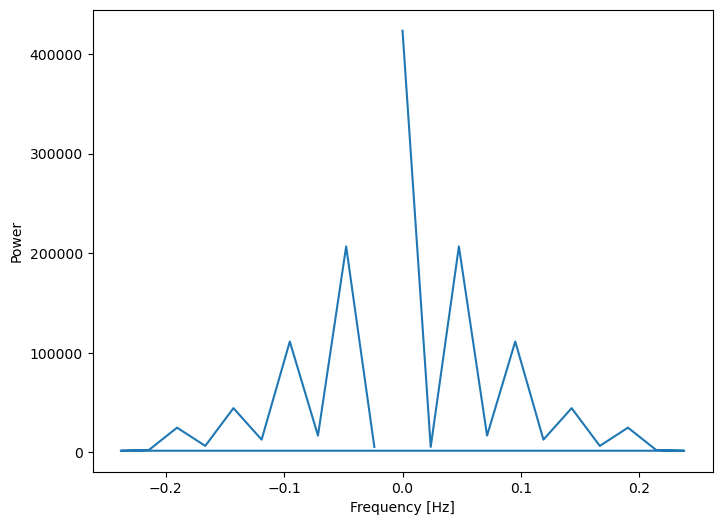

In [45]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

#salvo la colonn lynx in datset
dataset = []
with open('data/populations.txt') as f:
    for line in f:
        dataset.append(line.split('	')[2])

#rimuovo l'header "lynx"
dataset.remove('lynx')

#nuova lista che conterrà i valori in formato numero
datset_val=[]
#converto da string a float valutando l'esponente
for x in dataset:
    datset_val.append((eval(x)))
print(datset_val)

# The FFT of the signal
sig_fft = fftpack.fft(datset_val)
display(sig_fft)
time_step = 2
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(len(datset_val), d=time_step)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.